## Acquire

Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

* Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
* Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
* Only include properties that include a latitude and longitude value.

In [1]:
import numpy as np
import pandas as pd
import env

In [2]:
zillow_query = """
SELECT * FROM properties_2017
LEFT JOIN predictions_2017 ON predictions_2017.parcelid = properties_2017.parcelid
LEFT JOIN airconditioningtype ON airconditioningtype.airconditioningtypeid = properties_2017.airconditioningtypeid
LEFT JOIN architecturalstyletype ON architecturalstyletype.architecturalstyletypeid = properties_2017.architecturalstyletypeid
LEFT JOIN buildingclasstype ON buildingclasstype.buildingclasstypeid = properties_2017.buildingclasstypeid
LEFT JOIN storytype ON storytype.storytypeid = properties_2017.storytypeid
LEFT JOIN typeconstructiontype ON typeconstructiontype.typeconstructiontypeid = properties_2017.typeconstructiontypeid
LEFT JOIN heatingorsystemtype ON heatingorsystemtype.heatingorsystemtypeid = properties_2017.heatingorsystemtypeid
LEFT JOIN propertylandusetype ON propertylandusetype.propertylandusetypeid = properties_2017.propertylandusetypeid
WHERE (predictions_2017.transactiondate >= '2017-01-01'
    AND predictions_2017.transactiondate <= '2017-12-31')
      AND properties_2017.latitude IS NOT NULL
       AND properties_2017.longitude IS NOT NULL;
"""

In [3]:
zillow_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'

In [4]:
zillow = pd.read_sql(zillow_query, zillow_url)

In [5]:
#Duplicate parcelids still need to be dropped.
#Place df in ascending order of transaction date then drop_duplicatese with keep = last
zillow.transactiondate.sort_values()
zillow.transactiondate

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
77574    2017-09-20
77575    2017-09-20
77576    2017-09-21
77577    2017-09-21
77578    2017-09-25
Name: transactiondate, Length: 77579, dtype: object

In [6]:
#Now drop duplicates, but keep last occurence. This will ensure the latest transaction date is kept
zillow = zillow.drop_duplicates(subset = 'parcelid', keep = 'last')

## Summarize

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [7]:
#Summarize data by using .info(), .head(), .describe()
zillow.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid,buildingclassdesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc,heatingorsystemtypeid,heatingorsystemdesc,propertylandusetypeid,propertylandusedesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,None,NaN,None,NaN,None,NaN,None,261,Single Family Residential
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,None,NaN,None,NaN,None,NaN,None,261,Single Family Residential
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,NaN,None,NaN,None,NaN,None,NaN,None,261,Single Family Residential
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,NaN,None,NaN,None,NaN,None,2.0,Central,261,Single Family Residential
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,NaN,None,NaN,None,NaN,None,2.0,Central,266,Condominium


In [8]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77578
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77381 non-null  int64  
 1   parcelid                      77381 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77185 non-null  float64
 13  f

In [9]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
id,77381.0,1.495139e+06,8.609071e+05,349.0,752070.0,1497932.0,2240535.0,2982274.0
parcelid,77381.0,1.300715e+07,3.481346e+06,10711855.0,11538305.0,12531568.0,14211831.0,167689317.0
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.0,1.0,1.0,1.0,13.0
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.0,7.0,7.0,7.0,21.0
basementsqft,50.0,6.797200e+02,6.897035e+02,38.0,273.0,515.0,796.5,3560.0
...,...,...,...,...,...,...,...,...
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.0,4.0,4.0,4.0,4.0
storytypeid,50.0,7.000000e+00,0.000000e+00,7.0,7.0,7.0,7.0,7.0
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.0,6.0,6.0,6.0,13.0
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.0,2.0,2.0,7.0,24.0


## Find the Nulls

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [11]:
nulls_by_col(zillow)

,num_rows_missing,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,67.753066
architecturalstyletypeid,77175,99.733785
basementsqft,77331,99.935385
...,...,...
typeconstructiondesc,77159,99.713108
heatingorsystemtypeid,27941,36.108347
heatingorsystemdesc,27941,36.108347
propertylandusetypeid,0,0.000000


__Key Takeaways:__

* Since there are a total of 77, 381 entries, if any columns are missing more than half of the entries, then just drop that column.
* For the other columns that are missing entries, if they are easy to impute and make sense, then do so. Otherwise, drop the column.
* 'id' columns are not necessary, so those can be dropped. 

Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [12]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'customer_id': 'num_rows'}).reset_index()
    return rows_missing

In [13]:
nulls_by_row(zillow)

,num_cols_missing,percent_cols_missing,index
0,25,32.467532467532465,2
1,26,33.76623376623377,11
2,27,35.064935064935064,21
3,28,36.36363636363637,39
4,29,37.66233766233766,43
5,30,38.961038961038966,36
6,31,40.25974025974026,230
7,32,41.55844155844156,178
8,33,42.857142857142854,4827
9,34,44.15584415584416,3304


## Prepare

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [14]:
#Drop duplicate columns because they are giving me issues
zillow = zillow.T.drop_duplicates(keep = 'last').T

In [15]:
#The following propertylandusetypeid's are single unit properties: 
#261, 262, 263, 264, 265, 266

zillow = zillow[(zillow.propertylandusetypeid >= 261) & 
               (zillow.propertylandusetypeid <= 266)]

In [16]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72027 entries, 0 to 77578
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            72027 non-null  object
 1   basementsqft                  50 non-null     object
 2   bathroomcnt                   72027 non-null  object
 3   bedroomcnt                    72027 non-null  object
 4   buildingqualitytypeid         44951 non-null  object
 5   calculatedbathnbr             71806 non-null  object
 6   decktypeid                    612 non-null    object
 7   finishedfloor1squarefeet      6018 non-null   object
 8   calculatedfinishedsquarefeet  71872 non-null  object
 9   finishedsquarefeet12          71693 non-null  object
 10  finishedsquarefeet13          2 non-null      object
 11  finishedsquarefeet15          11 non-null     object
 12  finishedsquarefeet50          6018 non-null   object
 13  finishedsquarefe

__Drop Values That Are Missing Many Entries__

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The Input:
* A Dataframe
* A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
* A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

The Output:
* The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [17]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [18]:
zillow = handle_missing_values(zillow)

In [19]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71894 entries, 0 to 77578
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            71894 non-null  object
 1   bathroomcnt                   71894 non-null  object
 2   bedroomcnt                    71894 non-null  object
 3   buildingqualitytypeid         44951 non-null  object
 4   calculatedbathnbr             71806 non-null  object
 5   calculatedfinishedsquarefeet  71872 non-null  object
 6   finishedsquarefeet12          71693 non-null  object
 7   fips                          71894 non-null  object
 8   fullbathcnt                   71806 non-null  object
 9   latitude                      71894 non-null  object
 10  longitude                     71894 non-null  object
 11  lotsizesquarefeet             63824 non-null  object
 12  propertycountylandusecode     71894 non-null  object
 13  propertyzoningde

__Decide how to handle the remaining missing values:__

* Fill with constant value.
* Impute with mean, median, mode.
* Drop row/column

In [20]:
zillow.isna().sum()

id                                  0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26943
calculatedbathnbr                  88
calculatedfinishedsquarefeet       22
finishedsquarefeet12              201
fips                                0
fullbathcnt                        88
latitude                            0
longitude                           0
lotsizesquarefeet                8070
propertycountylandusecode           0
propertyzoningdesc              26550
rawcensustractandblock              0
regionidcity                     1325
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26571
yearbuilt                          56
structuretaxvaluedollarcnt         79
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
censustracta

In [21]:
#Fill missing 'home_area' values with 'home_area' median
zillow.calculatedfinishedsquarefeet = zillow.calculatedfinishedsquarefeet.fillna(zillow.calculatedfinishedsquarefeet.median())

In [22]:
#Since there is no description to go with buildingqualitytypeid, drop the column
zillow.drop(columns = ['buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'unitcnt', 'id', 'propertylandusetypeid'], inplace = True)

In [23]:
#Impute the lotsizesquarefeet median value
lot_size_median = zillow.lotsizesquarefeet.median()
zillow.lotsizesquarefeet = zillow.lotsizesquarefeet.fillna(lot_size_median)

In [24]:
#Impute heatingorsystemdesc
zillow.heatingorsystemdesc.mode()

0    Central
dtype: object

In [25]:
#The most common value for this column is 'Central'
zillow.heatingorsystemdesc = zillow.heatingorsystemdesc.fillna('Central')

In [26]:
#Drop all other missing entries
zillow.dropna(inplace = True)

In [27]:
zillow.isna().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
parcelid                        0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

In [28]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70040 entries, 0 to 77578
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   70040 non-null  object 
 1   bedroomcnt                    70040 non-null  object 
 2   calculatedbathnbr             70040 non-null  object 
 3   calculatedfinishedsquarefeet  70040 non-null  float64
 4   finishedsquarefeet12          70040 non-null  object 
 5   fips                          70040 non-null  object 
 6   fullbathcnt                   70040 non-null  object 
 7   latitude                      70040 non-null  object 
 8   longitude                     70040 non-null  object 
 9   lotsizesquarefeet             70040 non-null  float64
 10  propertycountylandusecode     70040 non-null  object 
 11  rawcensustractandblock        70040 non-null  object 
 12  regionidcity                  70040 non-null  object 
 13  r

## Part 2 - Mall Customers

__Acquire data from mall_customers.customers in mysql database.__

In [29]:
mall_query = """
    SELECT * FROM customers;
"""

In [30]:
mall_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/mall_customers'

In [31]:
customers = pd.read_sql(mall_query, mall_url)

__Summarize data (include distributions and descriptive statistics).__

In [32]:
import wrangle_zillow

In [34]:
wrangle_zillow.summarize(customers)



Dataframe head: 
|    |   customer_id | gender   |   age |   annual_income |   spending_score |
|---:|--------------:|:---------|------:|----------------:|-----------------:|
|  0 |             1 | Male     |    19 |              15 |               39 |
|  1 |             2 | Male     |    21 |              15 |               81 |
|  2 |             3 | Female   |    20 |              16 |                6 |


Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Dataframe Description: 
|       |   customer_id |     age |   annual_income |   spending_score |
|

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the individual distributions
def get_dists(df):
    for col in df.columns:
        sns.histplot(x = col, data = df)
        plt.title(col)
        plt.show()

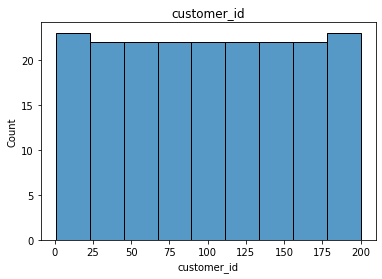

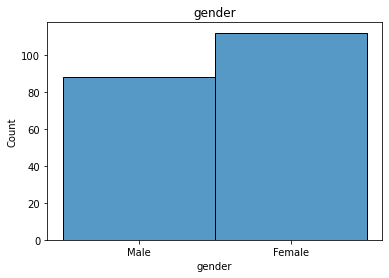

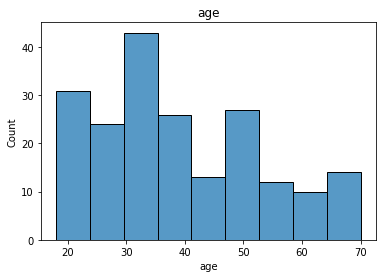

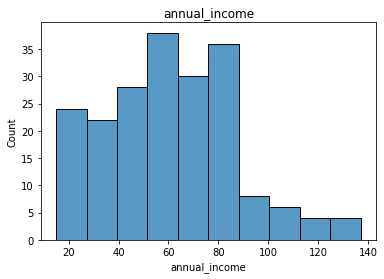

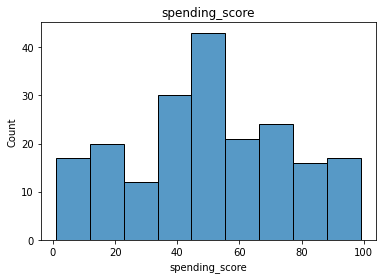

In [36]:
get_dists(customers)

__Detect outliers using IQR.__

In [37]:
def get_upper_outliers(s, k=1.5):
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [38]:
def add_upper_outlier_columns(df, k=1.5):
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], k)
    return df

In [39]:
customers = add_upper_outlier_columns(customers)

In [40]:
customers.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


No outliers, so drop those 'outliers_upper' columns.

In [43]:
customers = customers.drop(columns = ['customer_id_outliers_upper', 'age_outliers_upper', 'annual_income_outliers_upper', 'spending_score_outliers_upper'])

__Split data (train, validate, and test split).__

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
def train_validate_test_split(df, seed = 123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''



    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [46]:
train, validate, test = train_validate_test_split(customers)

In [49]:
#Make a list of columns to encode
cols_to_encode = ['gender']

#The following function will create dummy variables, remove the original column, and return the new data frames
def get_dummy_vars(train, validate, test, cols_to_encode):
    train_dummies = pd.get_dummies(train[cols_to_encode], dummy_na=False, drop_first=True)
    train = pd.concat([train, train_dummies], axis = 1).drop(columns = cols_to_encode)

    validate_dummies = pd.get_dummies(validate[cols_to_encode], dummy_na=False, drop_first=True)
    validate = pd.concat([validate, validate_dummies], axis = 1).drop(columns = cols_to_encode)

    test_dummies = pd.get_dummies(test[cols_to_encode], dummy_na=False, drop_first=True)
    test = pd.concat([test, test_dummies], axis = 1).drop(columns = cols_to_encode)

    return train, validate, test

In [50]:
train, validate, test = get_dummy_vars(train, validate, test, cols_to_encode)

__Handles missing values.__

In [52]:
train = handle_missing_values(train)
validate = handle_missing_values(validate)
test = handle_missing_values(test)

__Scaling__

In [59]:
#Split the data in X and y groups
X_train, y_train = train.drop('spending_score', axis = 1), train.spending_score
X_validate, y_validate = validate.drop('spending_score', axis = 1), validate.spending_score
X_test, y_test = test.drop('spending_score', axis = 1), test.spending_score

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
def scale_data(X_train, X_validate, X_test):
    #Create the scaler
    scaler = StandardScaler()

    #Fit the scaler on X_train
    scaler.fit(X_train)

    #Transform the data
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_validate_scaled, X_test_scaled

In [57]:
X_train.head()

,customer_id,gender,age,annual_income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [60]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test)

In [62]:
cols_to_scale = ['customer_id', 'age', 'annual_income', 'gender_Male']
cols_scaled = ['customer_id_scaled', 'age_scaled', 'annual_income_scaled', 'gender_Male']

train[cols_scaled] = X_train_scaled
validate[cols_scaled] = X_validate_scaled
test[cols_scaled] = X_test_scaled

In [63]:
def compare_dists(train, cols_to_scale, cols_scaled):

    plt.figure(figsize=(18,6))

    for i, col in enumerate(cols_to_scale):
        i += 1
        plt.subplot(2,4,i)
        train[col].plot.hist()
        plt.title(col)

    for i, col in enumerate(cols_scaled):
        i += 5
        plt.subplot(2,4,i)
        train[col].plot.hist()
        plt.title(col)

    plt.tight_layout()
    plt.show()

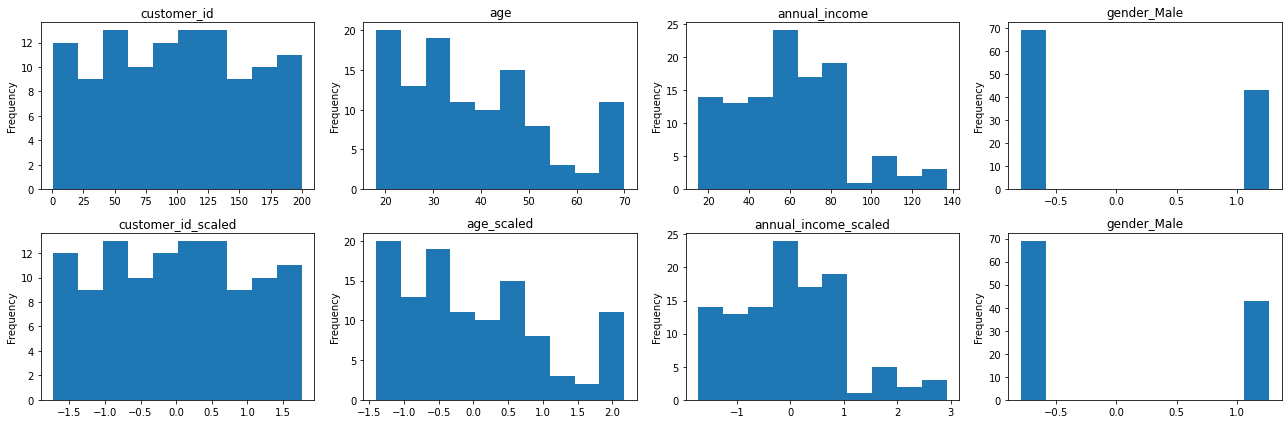

In [64]:
compare_dists(train, cols_to_scale, cols_scaled)